In [35]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from keras.preprocessing import image
pd.options.display.max_columns = 50

In [36]:
train_df = pd.read_csv('/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
train_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
val_df = pd.read_csv('/kaggle/input/retinal-disease-classification/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
val_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
test_df = pd.read_csv('/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')
test_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,638,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
train_df['img_path'] = [f'/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/Training/{id}.png' for id in train_df['ID']]

In [40]:
train_df.head(3)

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...


In [41]:
val_df['img_path'] = [f'/kaggle/input/retinal-disease-classification/Evaluation_Set/Evaluation_Set/Validation/{id}.png' for id in val_df['ID']]
val_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
4,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
636,637,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
637,638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...
638,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/E...


In [42]:
test_df['img_path'] = [f'/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/Test/{id}.png' for id in test_df['ID']]
test_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
636,637,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
637,638,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
638,639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...


In [43]:
train_df = train_df.drop(labels=['ID'],axis=1)

In [44]:
columns = list(train_df.columns)
columns.remove('img_path')
d_total = 0
for col in columns:
    print(col)
    print(train_df[col].value_counts())
    print('----------------')
    if col != 'Disease_Risk':
        d_total += train_df[col].sum()
        
print(d_total)

Disease_Risk
Disease_Risk
1    1519
0     401
Name: count, dtype: int64
----------------
DR
DR
0    1544
1     376
Name: count, dtype: int64
----------------
ARMD
ARMD
0    1820
1     100
Name: count, dtype: int64
----------------
MH
MH
0    1603
1     317
Name: count, dtype: int64
----------------
DN
DN
0    1782
1     138
Name: count, dtype: int64
----------------
MYA
MYA
0    1819
1     101
Name: count, dtype: int64
----------------
BRVO
BRVO
0    1847
1      73
Name: count, dtype: int64
----------------
TSLN
TSLN
0    1734
1     186
Name: count, dtype: int64
----------------
ERM
ERM
0    1906
1      14
Name: count, dtype: int64
----------------
LS
LS
0    1873
1      47
Name: count, dtype: int64
----------------
MS
MS
0    1905
1      15
Name: count, dtype: int64
----------------
CSR
CSR
0    1883
1      37
Name: count, dtype: int64
----------------
ODC
ODC
0    1638
1     282
Name: count, dtype: int64
----------------
CRVO
CRVO
0    1892
1      28
Name: count, dtype: int64
-------

In [45]:
train_df = train_df.drop(labels=['Disease_Risk','ODPM', 'HR'], axis=1)
val_df = val_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)
test_df = test_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)

In [46]:
train_df.columns

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'PRH',
       'MNF', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO',
       'PLQ', 'HPED', 'CL', 'img_path'],
      dtype='object')

In [47]:
train_df[train_df['PTCR']==1]

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,PRH,MNF,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...
982,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,/kaggle/input/retinal-disease-classification/T...


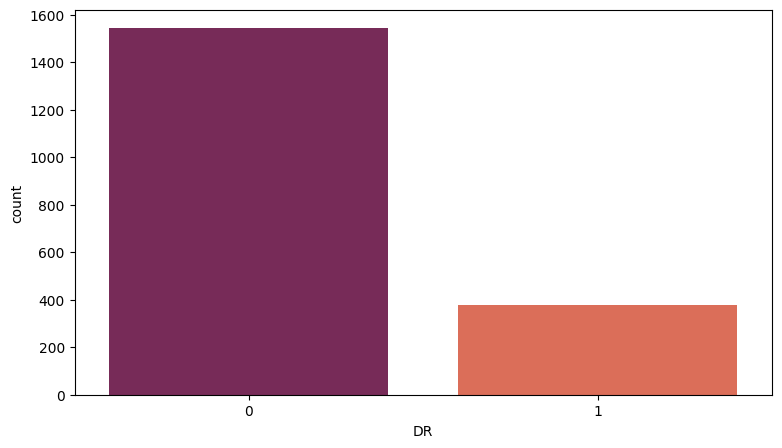

In [48]:
import seaborn as sns
# Check if 'labels' column exists in your DataFrame
if 'DR' in train_df.columns:
    # Display the number of pictures of each category
    vc = train_df['DR'].value_counts()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=vc.index, y=vc, palette="rocket")
else:
    print("'DR' column not found in the DataFrame.")

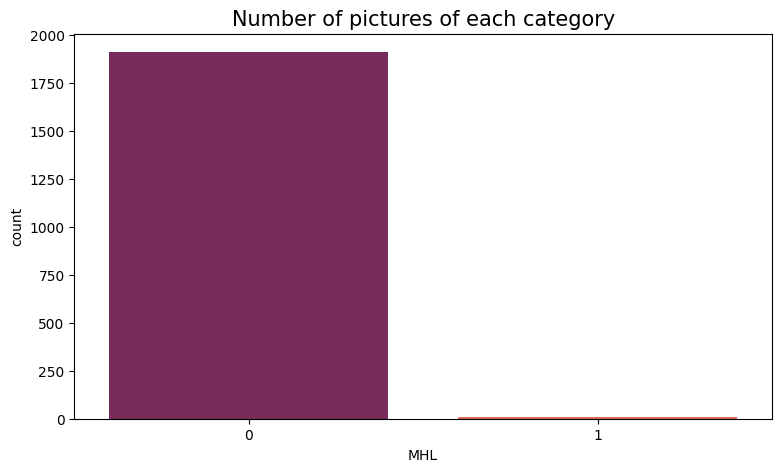

In [49]:
# Display the number of pictures of each category
vc = train_df['MHL'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [50]:
def weight_calc(col):
    total = len(train_df)
    weight = (1 / train_df[col].sum()) *  total / 2
    return weight

In [51]:
Y_train = list(train_df.drop(['img_path'], axis=1).columns)
Y_val = list(val_df.drop(['img_path'], axis=1).columns)
Y_test = list(test_df.drop(['img_path'], axis=1).columns)
unq_disease = len(Y_train)

In [52]:
import os
filepaths = pd.Series(Y_train, name='Filepath').astype(str)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)

,Filepath,Label
0,DN,
1,ERM,
2,BRVO,
3,PTCR,
4,MHL,


In [53]:

import keras.backend as K
gamma = 2.0
epsilon = K.epsilon()
def focal_loss(y_true, y_pred):
    pt = y_pred * y_true + (1-y_pred) * (1-y_true)
    pt = K.clip(pt, epsilon, 1-epsilon)
    CE = -K.log(pt)
    FL = K.pow(1-pt, gamma) * CE
    loss = K.sum(FL, axis=1)
    return loss

In [54]:
class_weights = {}
for i in range(0, unq_disease):
    class_weights[f'{i}'] = weight_calc(Y_train[i])

In [55]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                                brightness_range=[0, 0.1])
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [56]:
train_gen = train_datagen.flow_from_dataframe(train_df,
                                                x_col='img_path',
                                                y_col=Y_train,
                                                target_size=(150,150),
                                                class_mode='raw',
                                                batch_size=16,
                                                shuffle=True)

val_gen = val_datagen.flow_from_dataframe(val_df,
                                            x_col='img_path',
                                            y_col=Y_val,
                                            target_size=(150,150),
                                            class_mode='raw',
                                            batch_size=16)

test_gen = test_datagen.flow_from_dataframe(test_df,
                                                x_col='img_path',
                                                y_col=Y_test,
                                                target_size=(150,150),
                                                class_mode='raw',
                                                  batch_size=16)

Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


# **MixUP**

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def mixup(x, y, alpha=0.2):
    batch_size = len(x)
    lam = np.random.beta(alpha, alpha, batch_size)
    x_mix = lam.reshape(-1, 1, 1, 1) * x + (1 - lam).reshape(-1, 1, 1, 1) * np.flip(x, axis=0)
    
    # Mixup for multi-class labels
    y_mix = lam.reshape(-1, 1) * y + (1 - lam).reshape(-1, 1) * np.flip(y, axis=0)
    
    return x_mix, y_mix

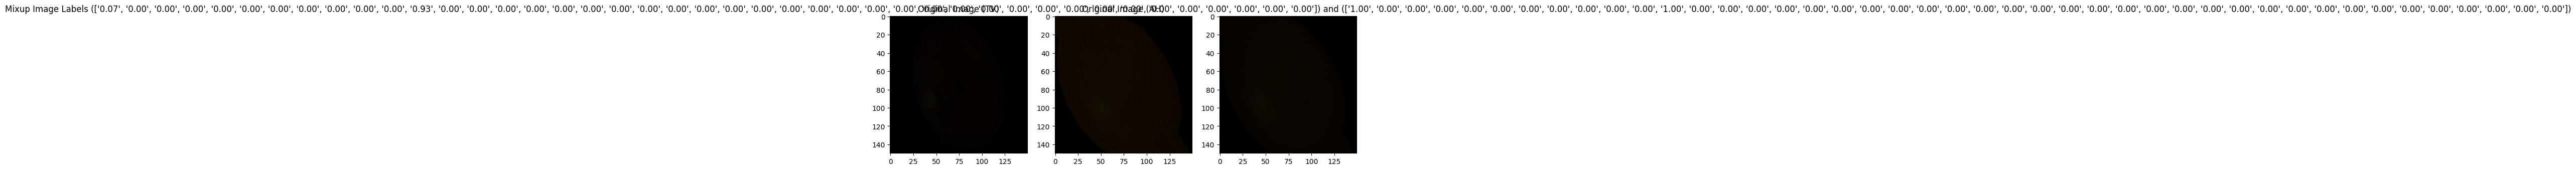

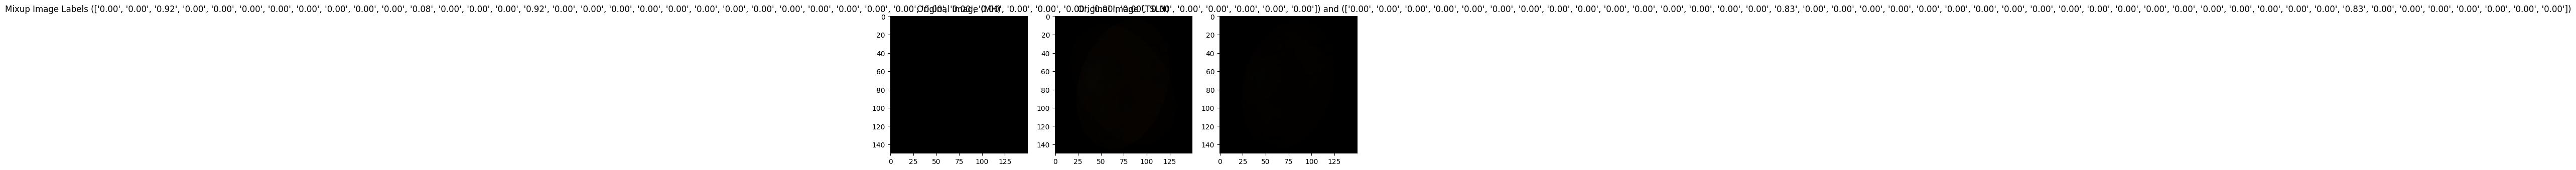

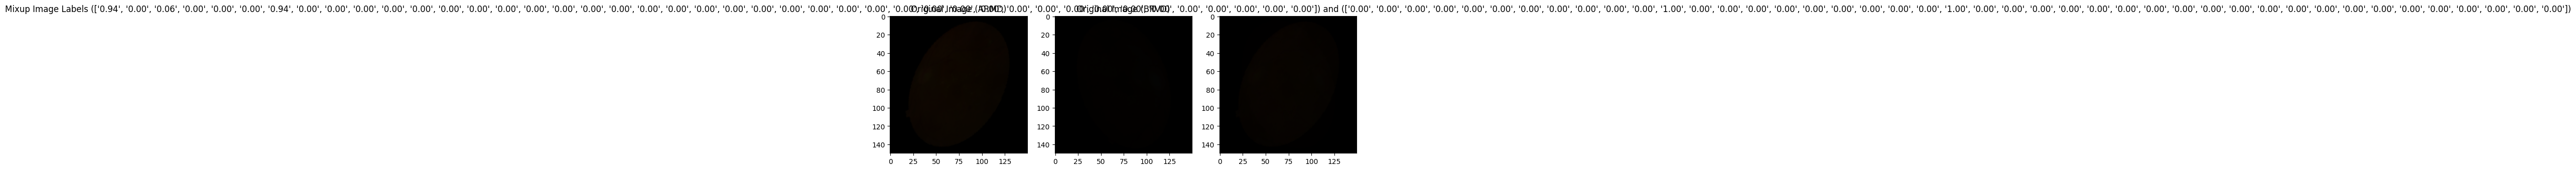

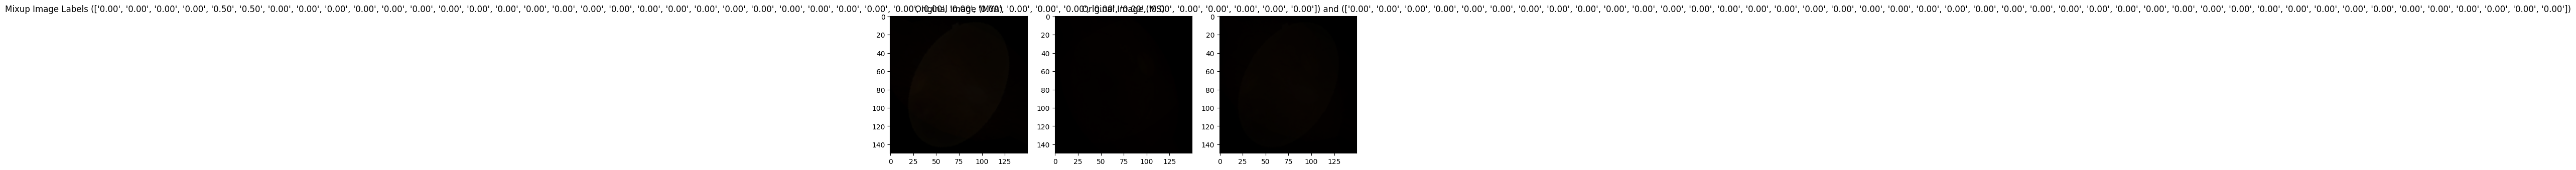

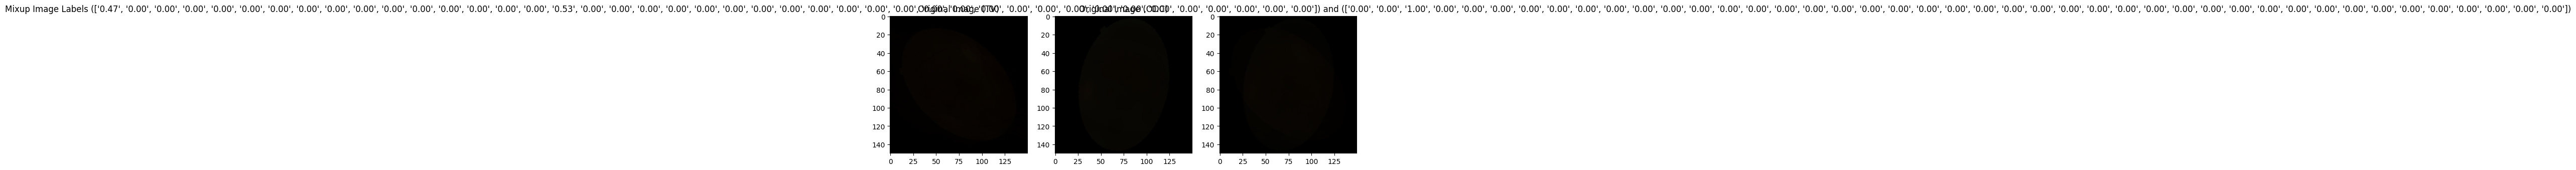

In [58]:
# Create Mixup data generator
def mixup_generator(train_gen, alpha=0.2):
    while True:
        x, y = next(train_gen)
        x_mix, y_mix = mixup(x, y, alpha=alpha)
        yield x_mix, y_mix

train_gen_mixup = mixup_generator(train_gen)

import numpy as np
import matplotlib.pyplot as plt

def plot_mixup_images(generator, num_samples=5):
    for _ in range(num_samples):
        x_mix, y_mix = next(generator)
        
        # Choose two random images from the batch
        idx1 = np.random.randint(len(x_mix))
        idx2 = np.random.randint(len(x_mix))
        
        # Plot the original images and the Mixup image
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(x_mix[idx1])
        plt.title(f'Original Image ({Y_train[idx1]})')
        
        plt.subplot(1, 3, 2)
        plt.imshow(x_mix[idx2])
        plt.title(f'Original Image ({Y_train[idx2]})')
        
        plt.subplot(1, 3, 3)
        plt.imshow(x_mix[idx1] * 0.5 + x_mix[idx2] * 0.5)  # Mixup image
        
        # Format the labels as a list
        label1 = [f"{y:.2f}" for y in y_mix[idx1]]
        label2 = [f"{y:.2f}" for y in y_mix[idx2]]
        plt.title(f'Mixup Image Labels ({label1}) and ({label2})')
        
        plt.show()

# Plot Mixup images
plot_mixup_images(train_gen_mixup, num_samples=5)

In [59]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [60]:
# local_weights_file = '../input/inceptionv3weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
pre_trained_model = MobileNetV2(input_shape = (150,150, 3), 
                                include_top = False, 
                                weights = None)
# pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('Conv_1')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1280)


In [61]:
x = layers.Flatten()(last_output)
x = layers.Dropout(0.5)(x) 
x = layers.Dense(1024, activation='relu')(x)                 
x = layers.Dense (1, activation='sigmoid')(x)           
model = Model( pre_trained_model.input, x) 
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']         

In [63]:
history = model.fit(
            train_gen,
            validation_data = val_gen,
            steps_per_epoch=20,
            epochs =50,
            validation_steps=5,
            verbose = 1,
            callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=2,
                restore_best_weights=True
            )
        ]
)

Epoch 1/50
20/20 [==============================] - 73s 4s/step - loss: 0.6758 - accuracy: 0.9751 - val_loss: 0.6617 - val_accuracy: 0.9750
Epoch 2/50
20/20 [==============================] - 64s 3s/step - loss: 0.6503 - accuracy: 0.9753 - val_loss: 0.6381 - val_accuracy: 0.9712
Epoch 3/50
20/20 [==============================] - 69s 3s/step - loss: 0.6257 - accuracy: 0.9761 - val_loss: 0.6130 - val_accuracy: 0.9738
Epoch 4/50
20/20 [==============================] - 68s 3s/step - loss: 0.6003 - accuracy: 0.9763 - val_loss: 0.5870 - val_accuracy: 0.9750
Epoch 5/50
20/20 [==============================] - 69s 3s/step - loss: 0.5745 - accuracy: 0.9751 - val_loss: 0.5601 - val_accuracy: 0.9767
Epoch 6/50
20/20 [==============================] - 70s 4s/step - loss: 0.5480 - accuracy: 0.9747 - val_loss: 0.5338 - val_accuracy: 0.9747
Epoch 7/50
20/20 [==============================] - 61s 3s/step - loss: 0.5203 - accuracy: 0.9759 - val_loss: 0.5049 - val_accuracy: 0.9782
Epoch 8/50
20/20 [==

In [64]:
results = model.evaluate(test_gen)

40/40 [==============================] - 97s 2s/step - loss: 0.1269 - accuracy: 0.9757


In [65]:
import tensorflow as tf
from IPython.display import display, Markdown
# Using the `printmd` function to display formatted text
display(Markdown("## Test Loss: {:.5f}".format(results[0])))
display(Markdown("## Accuracy on the test set: {:.2f}%".format(results[1] * 100)))
'''
before focal loss 
Test Loss: 0.11524
Accuracy on the test set: 97.57%
'''

## Test Loss: 0.12690

## Accuracy on the test set: 97.57%

'\nbefore focal loss \nTest Loss: 0.11524\nAccuracy on the test set: 97.57%\n'

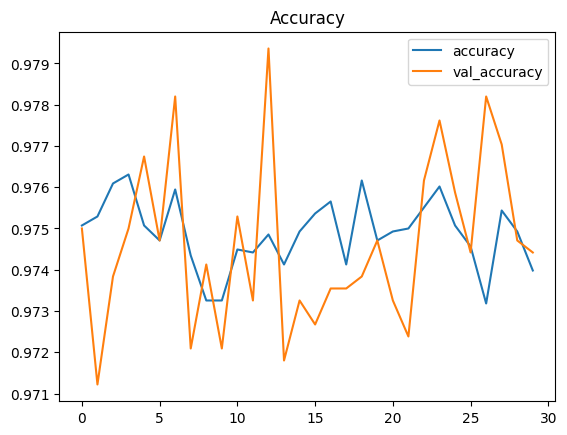

In [69]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

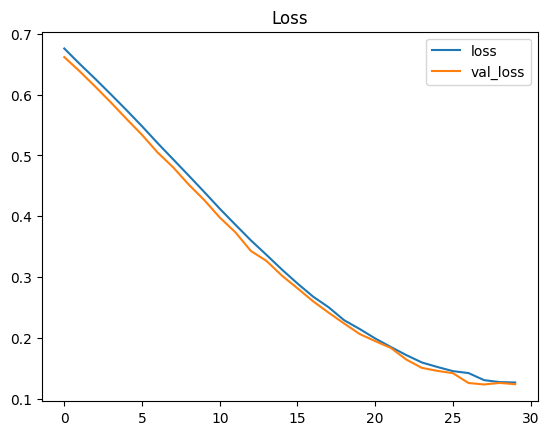

In [70]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [71]:
diseased_labels = []
for i in test_gen.labels:
    if(i.any() == 1):
        diseased_labels.append(1)
    else:
        diseased_labels.append(0)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

predictions = model.predict(test_gen)
transfer_thres = np.average(predictions)
y_pred = (predictions > transfer_thres)*1

40/40 [==============================] - 97s 2s/step


Transfer model confusion matrix


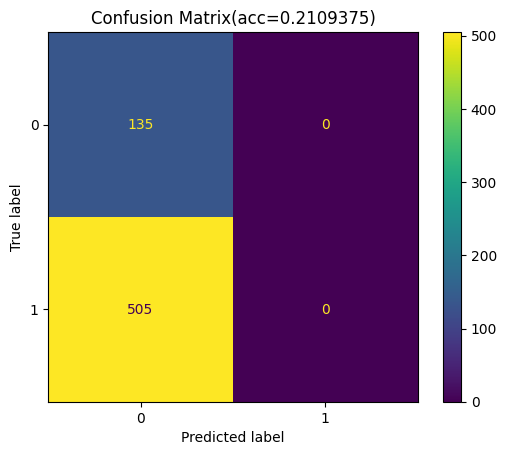

In [74]:
print("Transfer model confusion matrix")
transfer_acc = accuracy_score(diseased_labels, y_pred)
transfer_cm = confusion_matrix(diseased_labels, y_pred)
transfer_disp = ConfusionMatrixDisplay(transfer_cm)
transfer_disp.plot()
plt.title(f'Confusion Matrix(acc={transfer_acc})')
plt.show()

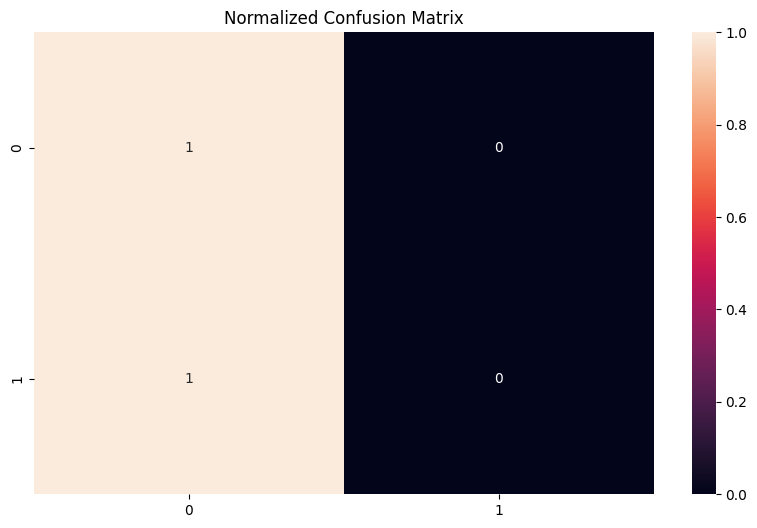

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(diseased_labels, y_pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(diseased_labels)), yticklabels = sorted(set(diseased_labels)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [76]:
from sklearn.metrics import classification_report
from sklearn import metrics
print('Accuracy:', np.round(metrics.accuracy_score(diseased_labels, y_pred),5))
print('Precision:', np.round(metrics.precision_score(diseased_labels, y_pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(diseased_labels,y_pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(diseased_labels, y_pred, average='weighted'),5))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(diseased_labels, y_pred),5))
print(classification_report(diseased_labels, y_pred))

Accuracy: 0.21094
Precision: 0.04449
Recall: 0.21094
F1 Score: 0.07349
Cohen Kappa Score: 0.0
              precision    recall  f1-score   support

           0       0.21      1.00      0.35       135
           1       0.00      0.00      0.00       505

    accuracy                           0.21       640
   macro avg       0.11      0.50      0.17       640
weighted avg       0.04      0.21      0.07       640



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

# **ROC curve**

In [77]:
from sklearn.metrics import roc_curve, auc

# After model training, predict probabilities for each class
y_pred_probs = model.predict(test_gen)

40/40 [==============================] - 115s 3s/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ran

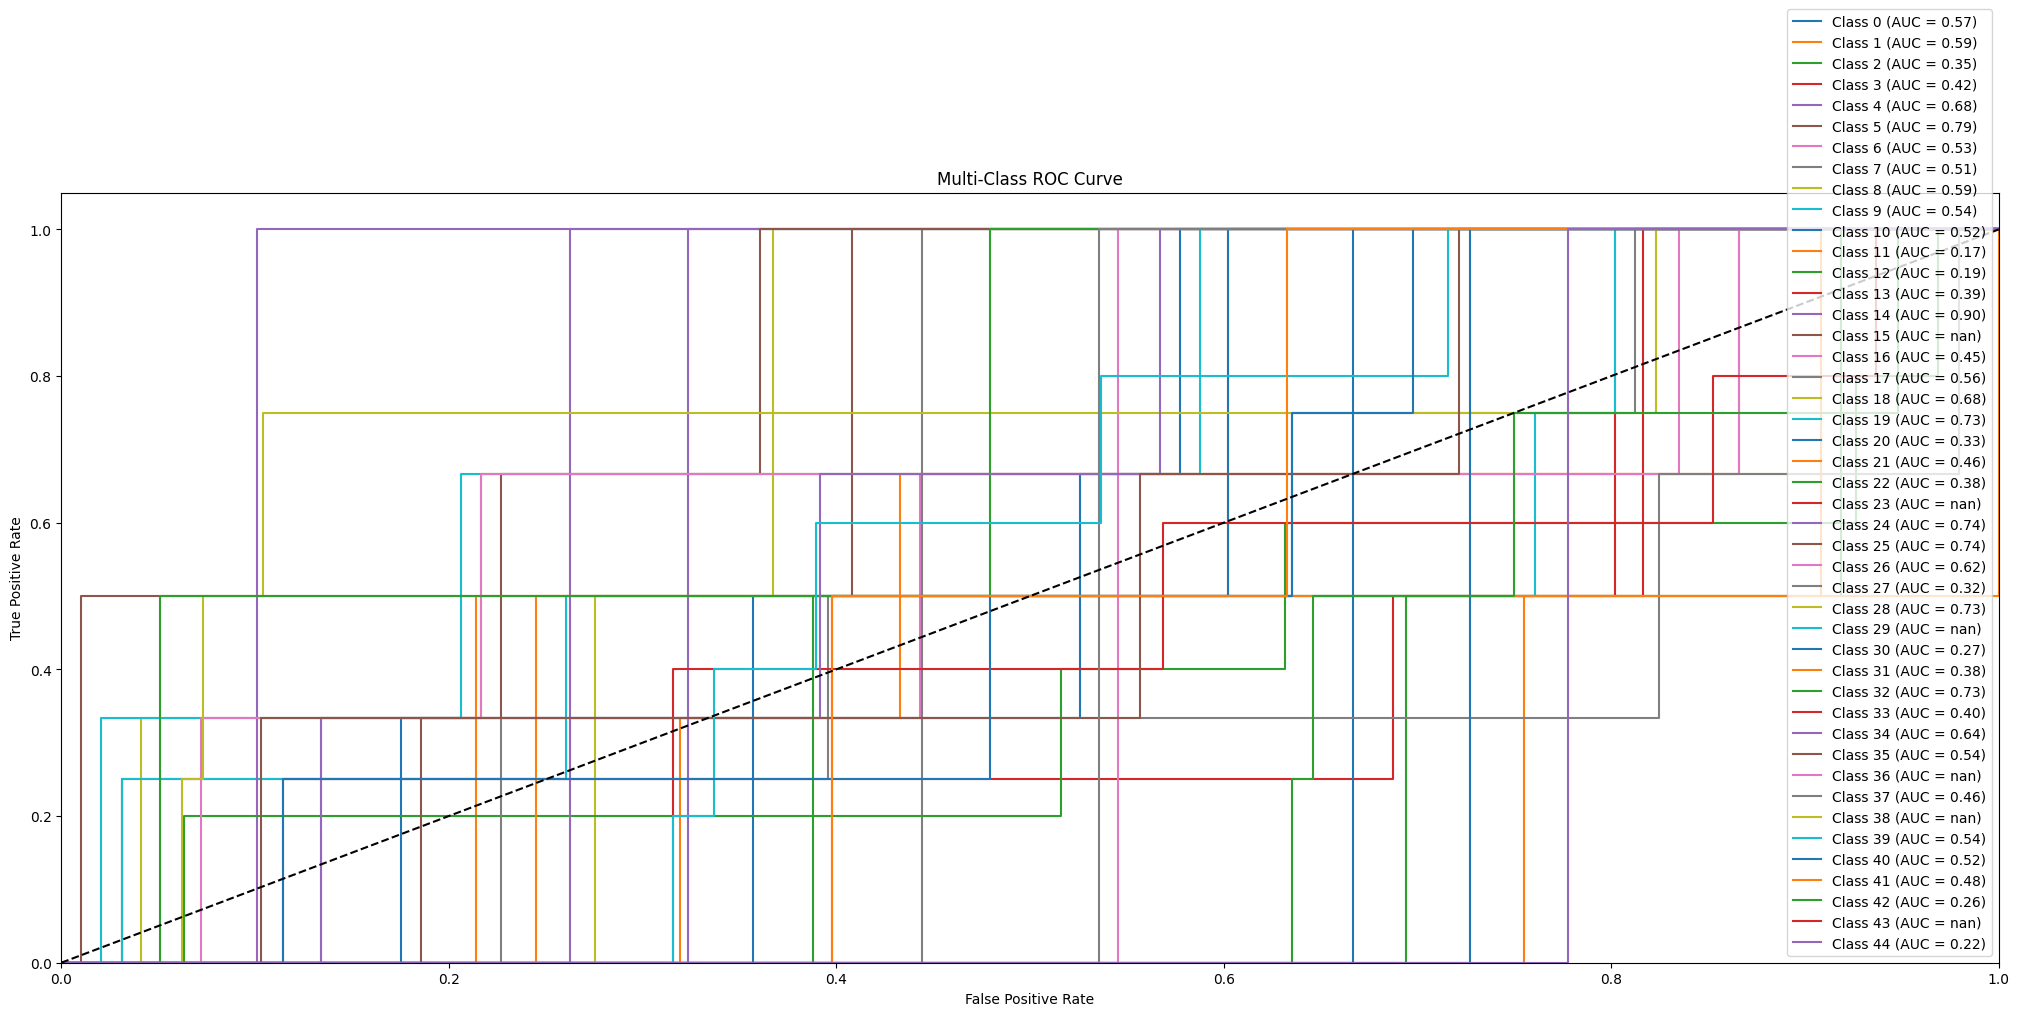

In [79]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a model that predicts probabilities for each class
# Replace y_pred_probs with your model's predicted probabilities
# y_pred_probs should be a 2D array with shape (num_samples, num_classes)
# Replace test_labels with your true labels (ground truth) for each sample
# test_labels should be an array with shape (num_samples,)
y_pred_probs = np.random.rand(100, 45)  # Example random predicted probabilities
test_labels = np.random.randint(45, size=100)  # Example random true labels

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_probs.shape[1]  # Number of classes

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(25, 10))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **gradCam**

In [80]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00


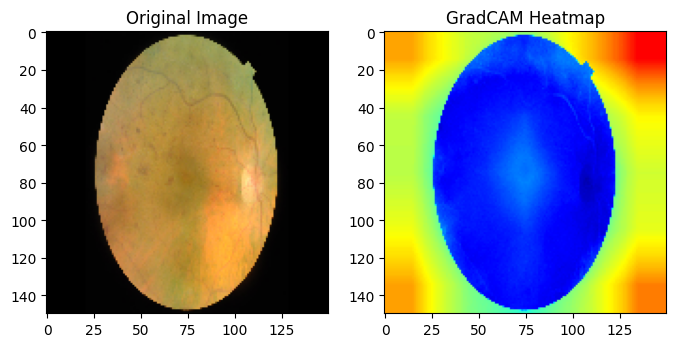

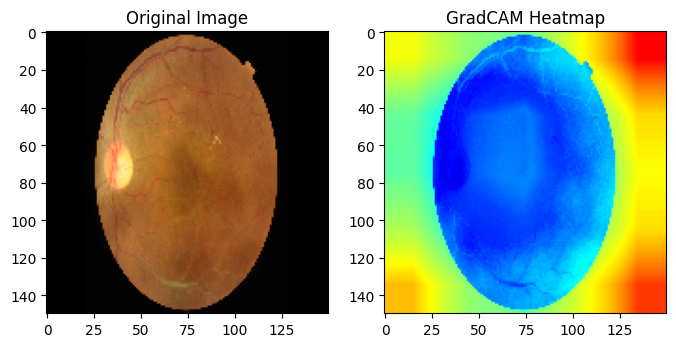

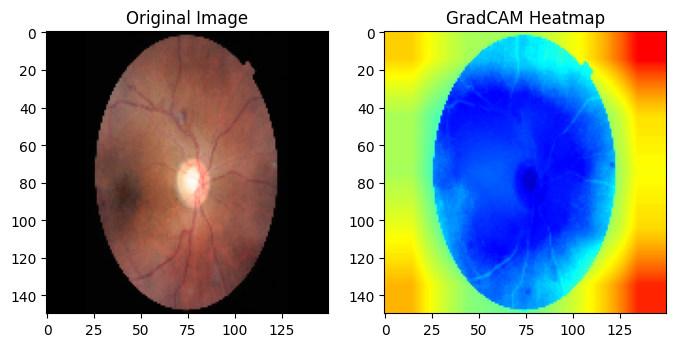

In [ ]:
from tf_explain.core.grad_cam import GradCAM
import cv2

# Choose an image index for GradCAM visualization
image_index = np.random.rand(20)  # Change this to the index of the image you want to visualize

# Load the image using tf.keras
for image_index in range(20):
    image_path = test_df['img_path'][image_index]
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)


# Preprocess the image
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

# Create GradCAM explainer
    explainer = GradCAM()

# Choose the layer for visualization (e.g., the last convolutional layer)
    layer_name = "Conv_1"

# Explain the model's prediction
    grid = explainer.explain(validation_data=(img_array, None), model=model, class_index=0, layer_name=layer_name)

# Plot the original image and GradCAM heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * grid), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap)
    plt.title('GradCAM Heatmap')
    plt.show()
    image_index=+1

In [82]:
model.save('MobileNet_v2new50.h5')